In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\91995\Downloads\Machine\MachineLearning2026_JunedKhan\Datasets\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [5]:
features = [
    'Age',
    'DailyRate',
    'DistanceFromHome',
    'HourlyRate',
    'MonthlyIncome',
    'MonthlyRate',
    'NumCompaniesWorked',
    'TotalWorkingYears'
]

X = df[features].values
y = df['Attrition'].values.reshape(-1,1)

In [6]:
X = (X - X.mean(axis=0)) / X.std(axis=0)

In [7]:
m = X.shape[0]
X = np.hstack((np.ones((m,1)), X))

In [8]:
n = X.shape[1]
weights = np.zeros((n,1))

In [9]:
def compute_cost(X, y, weights):
    m = len(y)
    predictions = X.dot(weights)
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

In [10]:
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        predictions = X.dot(weights)
        errors = predictions - y
        
        gradients = (1/m) * X.T.dot(errors)
        weights = weights - learning_rate * gradients
        
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)
        
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost}")
            
    return weights, cost_history

In [11]:
learning_rate = 0.01
iterations = 1000

weights, cost_history = gradient_descent(X, y, weights, learning_rate, iterations)

print("\nFinal Weights:\n", weights)

Iteration 0: Cost = 0.08023099204580689
Iteration 100: Cost = 0.06596284445921016
Iteration 200: Cost = 0.06422274546839915
Iteration 300: Cost = 0.06397558950343997
Iteration 400: Cost = 0.0639375084153827
Iteration 500: Cost = 0.06393064610881002
Iteration 600: Cost = 0.06392905733308715
Iteration 700: Cost = 0.06392857530102795
Iteration 800: Cost = 0.0639283961206849
Iteration 900: Cost = 0.0639283198351055

Final Weights:
 [[ 0.16121753]
 [-0.0400019 ]
 [-0.02092266]
 [ 0.02929602]
 [-0.00318933]
 [-0.02347333]
 [ 0.00601405]
 [ 0.03950314]
 [-0.02703168]]


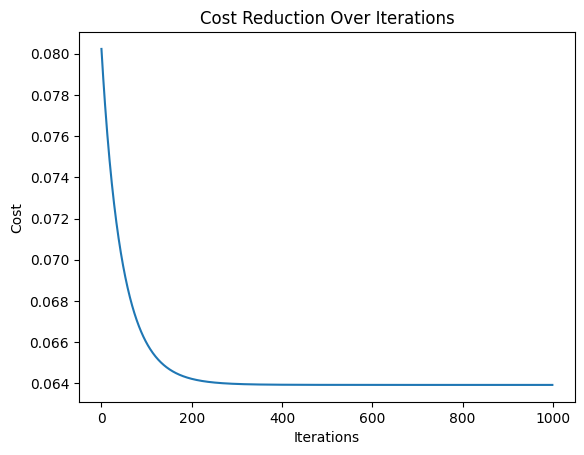

In [12]:
plt.figure()
plt.plot(range(iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Reduction Over Iterations")
plt.show()

In [13]:
y_pred = X.dot(weights)

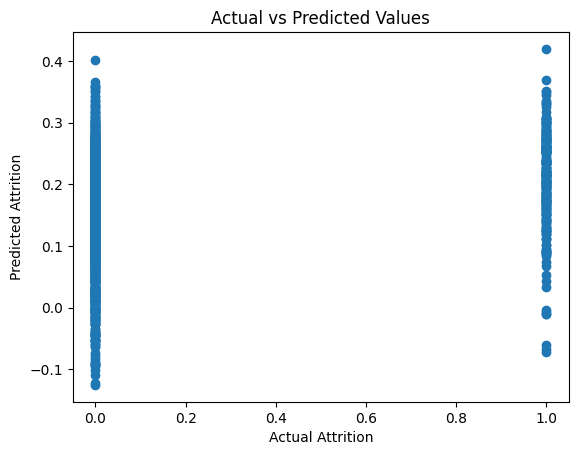

In [14]:
plt.figure()
plt.scatter(y, y_pred)
plt.xlabel("Actual Attrition")
plt.ylabel("Predicted Attrition")
plt.title("Actual vs Predicted Values")
plt.show()

In [15]:
X_age = df[['Age']].values
y_age = df['Attrition'].values.reshape(-1,1)

In [16]:
X_age = (X_age - X_age.mean()) / X_age.std()
X_age = np.hstack((np.ones((len(X_age),1)), X_age))
weights_age = np.zeros((2,1))
weights_age, _ = gradient_descent(X_age, y_age, weights_age, 0.01, 1000)

Iteration 0: Cost = 0.08031950657875017
Iteration 100: Cost = 0.0678334593712779
Iteration 200: Cost = 0.0661605828261596
Iteration 300: Cost = 0.06593645137056714
Iteration 400: Cost = 0.06590642231102142
Iteration 500: Cost = 0.06590239902738719
Iteration 600: Cost = 0.06590185998915402
Iteration 700: Cost = 0.0659017877689868
Iteration 800: Cost = 0.06590177809295227
Iteration 900: Cost = 0.06590177679656031


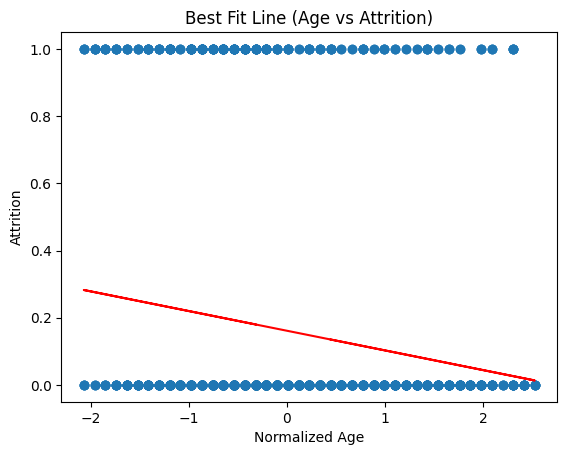

In [17]:
plt.figure()
plt.scatter(X_age[:,1], y_age)
plt.plot(X_age[:,1], X_age.dot(weights_age), color='red')
plt.xlabel("Normalized Age")
plt.ylabel("Attrition")
plt.title("Best Fit Line (Age vs Attrition)")
plt.show()